#Vous êtes consultant  freelance, une entreprise indienne de vente de motos KPMG’s souhaite que vous fournissiez à ses équipes marketing une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.


#Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.


#Vous devrez fournir à l’équipe marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

#La première partie intitulée Analyse exploratoire. Il consistera à charger nos données pour comprendre qu'est ce qu'elles contiennent

In [ ]:
import pandas as pd

# Chemin vers ton fichier Excel
fichier_excel = "KPMG_dummy_data.xlsx"

# Lire toutes les feuilles dans un dictionnaire {nom_feuille: DataFrame}
feuilles = pd.read_excel(fichier_excel, sheet_name=None, engine='openpyxl')

# Afficher les noms des feuilles
print("Feuilles chargées :", list(feuilles.keys()))

# Afficher un aperçu de chaque feuille
for nom, df in feuilles.items():
    print(f"\n📄 Feuille: {nom}")
    print(df.head())  # Affiche les 5 premières lignes de la feuille


Feuilles chargées : ['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']

📄 Feuille: Transactions
   transaction_id  product_id  customer_id transaction_date  online_order  \
0               1           2         2950       2017-02-25           0.0   
1               2           3         3120       2017-05-21           1.0   
2               3          37          402       2017-10-16           0.0   
3               4          88         3135       2017-08-31           0.0   
4               5          78          787       2017-10-01           1.0   

  order_status           brand product_line product_class product_size  \
0     Approved           Solex     Standard        medium       medium   
1     Approved   Trek Bicycles     Standard        medium        large   
2     Approved      OHM Cycles     Standard           low       medium   
3     Approved  Norco Bicycles     Standard        medium       medium   
4     Approved  Giant Bicycles     Standard 

Nous allons afficher les types de nos données

In [ ]:
# Afiicher les types de données dans transactions

transactions = feuilles['Transactions']
transactions.dtypes

,0
transaction_id,int64
product_id,int64
customer_id,int64
transaction_date,datetime64[ns]
online_order,float64
order_status,object
brand,object
product_line,object
product_class,object
product_size,object


In [ ]:
# Afiicher les types de données dans NewCustomerList

transactions = feuilles['NewCustomerList']
transactions.dtypes

,0
first_name,object
last_name,object
gender,object
past_3_years_bike_related_purchases,int64
DOB,object
job_title,object
job_industry_category,object
wealth_segment,object
deceased_indicator,object
owns_car,object


In [ ]:
# Afiicher les types de données dans CustomerDemographic

transactions = feuilles['CustomerDemographic']
transactions.dtypes

,0
customer_id,int64
first_name,object
last_name,object
gender,object
past_3_years_bike_related_purchases,int64
DOB,object
job_title,object
job_industry_category,object
wealth_segment,object
deceased_indicator,object


In [ ]:
# Afiicher les types de données dans CustomerAddress

transactions = feuilles['CustomerAddress']
transactions.dtypes

,0
customer_id,int64
address,object
postcode,int64
state,object
country,object
property_valuation,int64


Transformation des types de données en des types adéquats

In [ ]:
# Transformation des types de données en type adequat
# Pour la feuille Transactions
transactions = feuilles['Transactions']
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])
transactions['online_order'] = transactions['online_order'].astype('category')
transactions['order_status'] = transactions['order_status'].astype('category')

# Pour NewCustomerList
new_customer_list = feuilles['NewCustomerList']
new_customer_list['DOB'] = pd.to_datetime(new_customer_list['DOB'])
new_customer_list['gender'] = new_customer_list['gender'].astype('category')
new_customer_list['wealth_segment'] = new_customer_list['wealth_segment'].astype('category')
new_customer_list['deceased_indicator'] = new_customer_list['deceased_indicator'].astype('category')
new_customer_list['owns_car'] = new_customer_list['owns_car'].astype('category')
new_customer_list['state'] = new_customer_list['state'].astype('category')
new_customer_list['country'] = new_customer_list['country'].astype('category')
new_customer_list['property_valuation'] = new_customer_list['property_valuation'].astype('int64')

# Pour CustomerDemographic
customer_demographic = feuilles['CustomerDemographic']
customer_demographic['DOB'] = pd.to_datetime(customer_demographic['DOB'])
customer_demographic['gender'] = customer_demographic['gender'].astype('category')
customer_demographic['wealth_segment'] = customer_demographic['wealth_segment'].astype('category')
customer_demographic['deceased_indicator'] = customer_demographic['deceased_indicator'].astype('category')
customer_demographic['owns_car'] = customer_demographic['owns_car'].astype('category')

# Pour CustomerAddress
customer_address = feuilles['CustomerAddress']
customer_address['postcode'] = customer_address['postcode'].astype('int64')
customer_address['property_valuation'] = customer_address['property_valuation'].astype('int64')
customer_address['state'] = customer_address['state'].astype('category')
customer_address['country'] = customer_address['country'].astype('category')

# Afficher les dtypes après transformations
print("\n🏢 Types de données après transformation:")
print("\nTransactions Dtypes:")
print(transactions.dtypes)
print("\nNewCustomerList Dtypes:")
print(new_customer_list.dtypes)
print("\nCustomerDemographic Dtypes:")
print(customer_demographic.dtypes)
print("\nCustomerAddress Dtypes:")
print(customer_address.dtypes)


🏢 Types de données après transformation:

Transactions Dtypes:
transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                     category
order_status                     category
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

NewCustomerList Dtypes:
first_name                                     object
last_name                                      object
gender                                       category
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category      

Recapitualitif de toutes les feuilles que nous avons chargées

In [ ]:
# statistique desciptif de chaque feuille chargée
print("\n📊 Statistiques descriptives pour chaque feuille:")
for nom, df in feuilles.items():
    print(f"\n📈 Statistiques descriptives pour la feuille: {nom}")
    print(df.describe(include='all')) # include='all' inclut les variables catégorielles et numériques


📊 Statistiques descriptives pour chaque feuille:

📈 Statistiques descriptives pour la feuille: Transactions
        transaction_id   product_id   customer_id            transaction_date  \
count     20000.000000  20000.00000  20000.000000                       20000   
unique             NaN          NaN           NaN                         NaN   
top                NaN          NaN           NaN                         NaN   
freq               NaN          NaN           NaN                         NaN   
mean      10000.500000     45.36465   1738.246050  2017-07-01 14:08:05.280000   
min           1.000000      0.00000      1.000000         2017-01-01 00:00:00   
25%        5000.750000     18.00000    857.750000         2017-04-01 00:00:00   
50%       10000.500000     44.00000   1736.000000         2017-07-03 00:00:00   
75%       15000.250000     72.00000   2613.000000         2017-10-02 00:00:00   
max       20000.000000    100.00000   5034.000000         2017-12-30 00:00:00   


les statistiques descriptifs nous montrent clairement que nos données comportent des valeurs manquantes et sans doutes des valeurs abbérantes. Nous allons donc gérer les valeurs manquantes et ensuite gérer les valeurs abérantes


In [ ]:
# Vérification des valeurs manquantes dans chaque feuille
print("\n🔍 Vérification des valeurs manquantes:")
for nom, df in feuilles.items():
  print(f"\n🕵️‍♀️ Valeurs manquantes dans la feuille: {nom}")
  print(df.isnull().sum())

# Gestion des valeurs manquantes
# Pour Transactions, on peut observer des valeurs manquantes dans 'online_order' et 'brand'.
# 'online_order' est catégoriel, on peut imputer par le mode.
transactions['online_order'].fillna(transactions['online_order'].mode()[0], inplace=True)
# 'brand' est aussi catégoriel, on peut imputer par le mode ou une catégorie 'Inconnu'.
transactions['brand'].fillna('Inconnu', inplace=True)

# Pour NewCustomerList, beaucoup de valeurs manquantes.
# 'first_name', 'last_name' - Si on ne les utilise pas pour la segmentation, on peut les laisser ou les supprimer. Supprimons-les pour simplifier.
new_customer_list.drop(columns=['first_name', 'last_name'], inplace=True)
# 'gender' - Catégoriel, imputer par le mode.
new_customer_list['gender'].fillna(new_customer_list['gender'].mode()[0], inplace=True)
# 'DOB' - Date, peut être difficile à imputer. On peut supprimer les lignes si le nombre est faible, ou imputer avec la médiane/mode de l'âge si pertinent. Supprimons les lignes manquantes pour l'instant.
new_customer_list.dropna(subset=['DOB'], inplace=True)
# 'job_title', 'job_industry_category' - Catégoriels. On peut imputer par 'Inconnu' ou le mode. Utilisons 'Inconnu'.
new_customer_list['job_title'].fillna('Inconnu', inplace=True)
new_customer_list['job_industry_category'].fillna('Inconnu', inplace=True)
# 'wealth_segment', 'deceased_indicator', 'owns_car', 'country' - Peu de valeurs manquantes. Imputation par le mode.
new_customer_list['wealth_segment'].fillna(new_customer_list['wealth_segment'].mode()[0], inplace=True)
new_customer_list['deceased_indicator'].fillna(new_customer_list['deceased_indicator'].mode()[0], inplace=True)
new_customer_list['owns_car'].fillna(new_customer_list['owns_car'].mode()[0], inplace=True)
new_customer_list['country'].fillna(new_customer_list['country'].mode()[0], inplace=True)
# 'property_valuation' - Numérique, imputer par la médiane.
new_customer_list['property_valuation'].fillna(new_customer_list['property_valuation'].median(), inplace=True)

# Pour CustomerDemographic, valeurs manquantes dans 'gender', 'DOB', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator'.
# 'gender' - Catégoriel, imputer par le mode.
customer_demographic['gender'].fillna(customer_demographic['gender'].mode()[0], inplace=True)
# 'DOB' - Date, supprimer les lignes manquantes.
customer_demographic.dropna(subset=['DOB'], inplace=True)
# 'job_title', 'job_industry_category' - Catégoriels, imputer par 'Inconnu'.
customer_demographic['job_title'].fillna('Inconnu', inplace=True)
customer_demographic['job_industry_category'].fillna('Inconnu', inplace=True)
# 'wealth_segment', 'deceased_indicator' - Catégoriels, imputer par le mode.
customer_demographic['wealth_segment'].fillna(customer_demographic['wealth_segment'].mode()[0], inplace=True)
customer_demographic['deceased_indicator'].fillna(customer_demographic['deceased_indicator'].mode()[0], inplace=True)

# Pour CustomerAddress, pas de valeurs manquantes à gérer basées sur les statistiques initiales.

# Vérification des valeurs manquantes après imputation
print("\n✅ Vérification des valeurs manquantes après gestion:")
print("\n🕵️‍♀️ Valeurs manquantes dans la feuille: Transactions")
print(transactions.isnull().sum())
print("\n🕵️‍♀️ Valeurs manquantes dans la feuille: NewCustomerList")
print(new_customer_list.isnull().sum())
print("\n🕵️‍♀️ Valeurs manquantes dans la feuille: CustomerDemographic")
print(customer_demographic.isnull().sum())
print("\n🕵️‍♀️ Valeurs manquantes dans la feuille: CustomerAddress")
print(customer_address.isnull().sum())


# Gestion des valeurs aberrantes
# Dans Transactions, 'list_price', 'standard_cost', 'profit' pourraient avoir des valeurs aberrantes.
# On peut utiliser le Z-score ou l'IQR pour identifier et potentiellement supprimer ou remplacer les valeurs aberrantes.
# Utilisons l'IQR pour 'profit' (list_price - standard_cost). Calculons le profit d'abord.
transactions['profit'] = transactions['list_price'] - transactions['standard_cost']

# Calcul de l'IQR pour 'profit'
Q1_profit = transactions['profit'].quantile(0.25)
Q3_profit = transactions['profit'].quantile(0.75)
IQR_profit = Q3_profit - Q1_profit

# Définir les limites pour les valeurs aberrantes
lower_bound_profit = Q1_profit - 1.5 * IQR_profit
upper_bound_profit = Q3_profit + 1.5 * IQR_profit

# Afficher le nombre de valeurs aberrantes pour 'profit'
aberrant_profit = transactions[(transactions['profit'] < lower_bound_profit) | (transactions['profit'] > upper_bound_profit)]
print(f"\n📉 Nombre de valeurs aberrantes détectées dans 'profit' (IQR): {len(aberrant_profit)}")

# Capper les valeurs aberrantes pour 'profit' aux limites de l'IQR
transactions['profit_capped'] = transactions['profit'].clip(lower=lower_bound_profit, upper=upper_bound_profit)
print("\n📊 Statistiques descriptives pour 'profit' avant et après capping:")
print("Avant capping:\n", transactions['profit'].describe())
print("Après capping:\n", transactions['profit_capped'].describe())

# On peut faire de même pour 'list_price' et 'standard_cost' si nécessaire.
# Par exemple, pour 'list_price':
Q1_list_price = transactions['list_price'].quantile(0.25)
Q3_list_price = transactions['list_price'].quantile(0.75)
IQR_list_price = Q3_list_price - Q1_list_price
lower_bound_list_price = Q1_list_price - 1.5 * IQR_list_price
upper_bound_list_price = Q3_list_price + 1.5 * IQR_list_price
aberrant_list_price = transactions[(transactions['list_price'] < lower_bound_list_price) | (transactions['list_price'] > upper_bound_list_price)]
print(f"Nombre de valeurs aberrantes détectées dans 'list_price' (IQR): {len(aberrant_list_price)}")
# Appliquer le capping
transactions['list_price_capped'] = transactions['list_price'].clip(lower=lower_bound_list_price, upper=upper_bound_list_price)

# Dans CustomerDemographic, 'past_3_years_bike_purchases' et 'Age' (calculé à partir de DOB) pourraient avoir des valeurs aberrantes.
# Calculons l'âge
customer_demographic['Age'] = (pd.to_datetime('now').year - customer_demographic['DOB'].dt.year).astype(int)

# Vérifier les âges extrêmes
print("\n👶👴 Vérification des âges:")
print(customer_demographic['Age'].describe())

# Des âges très bas (enfants) ou très élevés peuvent être considérés comme aberrants si l'on cible une population spécifique.
# Par exemple, si on considère que les clients ont entre 15 et 100 ans:
aberrant_age = customer_demographic[(customer_demographic['Age'] < 15) | (customer_demographic['Age'] > 100)]
print(f"Nombre de valeurs aberrantes détectées dans 'Age': {len(aberrant_age)}")

# Pour 'past_3_years_bike_purchases':
Q1_purchases = customer_demographic['past_3_years_bike_related_purchases'].quantile(0.25)
Q3_purchases = customer_demographic['past_3_years_bike_related_purchases'].quantile(0.75)
IQR_purchases = Q3_purchases - Q1_purchases
upper_bound_purchases = Q3_purchases + 1.5 * IQR_purchases # Les achats ne peuvent pas être négatifs
aberrant_purchases = customer_demographic[customer_demographic['past_3_years_bike_related_purchases'] > upper_bound_purchases]
print(f"Nombre de valeurs aberrantes détectées dans 'past_3_years_bike_purchases' (IQR): {len(aberrant_purchases)}")
# Appliquer le capping
customer_demographic['past_3_years_bike_purchases_capped'] = customer_demographic['past_3_years_bike_related_purchases'].clip(upper=upper_bound_purchases)


# Nous avons maintenant géré les valeurs manquantes et identifié/géré certaines valeurs aberrantes dans les feuilles.
# Ces feuilles nettoyées (avec '_capped' pour certaines colonnes) peuvent être utilisées pour l'analyse et la segmentation futures.
# Assurez-vous d'utiliser les colonnes cappées ('profit_capped', 'list_price_capped', 'past_3_years_bike_purchases_capped') pour les analyses quantitatives où les aberrants pourraient biaiser les résultats.

# Mettre à jour le dictionnaire des feuilles avec les dataframes modifiés si nécessaire
feuilles['Transactions'] = transactions
feuilles['NewCustomerList'] = new_customer_list
feuilles['CustomerDemographic'] = customer_demographic
feuilles['CustomerAddress'] = customer_address

print("\n✨ Nettoyage des données terminé.")
print("\n🔄 Aperçu des dataframes après nettoyage:")
print("\n📄 Feuille: Transactions")
print(feuilles['Transactions'].head())
print("\n📄 Feuille: NewCustomerList")
print(feuilles['NewCustomerList'].head())
print("\n📄 Feuille: CustomerDemographic")
print(feuilles['CustomerDemographic'].head())
print("\n📄 Feuille: CustomerAddress")
print(feuilles['CustomerAddress'].head())


🔍 Vérification des valeurs manquantes:

🕵️‍♀️ Valeurs manquantes dans la feuille: Transactions
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

🕵️‍♀️ Valeurs manquantes dans la feuille: NewCustomerList
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0

/tmp/ipython-input-9-2335078733.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions['online_order'].fillna(transactions['online_order'].mode()[0], inplace=True)
/tmp/ipython-input-9-2335078733.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin

Après le nettoyage et la transformation de nos données, la colonne default dans CustomerDemographic semble avoir été mal remplie car elle contient des valeurs inexploitables nous allons alors la supprimer

In [ ]:
# supprimer la colonne default dans la feuille CustomerDemographic

if 'default' in customer_demographic.columns:
    customer_demographic.drop(columns=['default'], inplace=True)
    print("\n🗑️ Colonne 'default' supprimée de CustomerDemographic.")
else:
    print("\n⚠️ Colonne 'default' n'existe pas dans CustomerDemographic.")

# Mettre à jour le dictionnaire des feuilles avec le dataframe CustomerDemographic modifié
feuilles['CustomerDemographic'] = customer_demographic

# Vérifier l'aperçu de CustomerDemographic après suppression
print("\n📄 Feuille: CustomerDemographic après suppression de 'default'")
print(feuilles['CustomerDemographic'].head())



🗑️ Colonne 'default' supprimée de CustomerDemographic.

📄 Feuille: CustomerDemographic après suppression de 'default'
   customer_id      first_name  last_name  gender  \
0            1         Laraine  Medendorp       F   
1            2             Eli    Bockman    Male   
2            3           Arlin     Dearle    Male   
3            4          Talbot        NaN    Male   
4            5  Sheila-kathryn     Calton  Female   

   past_3_years_bike_related_purchases        DOB               job_title  \
0                                   93 1953-10-12     Executive Secretary   
1                                   81 1980-12-16  Administrative Officer   
2                                   61 1954-01-20      Recruiting Manager   
3                                   33 1961-10-03                 Inconnu   
4                                   56 1977-05-13           Senior Editor   

  job_industry_category     wealth_segment deceased_indicator owns_car  \
0                Health  

Pour mieux apréhender nos données, nous effectuerons une analyse exploratoire visuelle en créer des graphiques, nous permettant de voir la distributions de nos données


📊 Création de visualisations pour la feuille 'Transactions'...


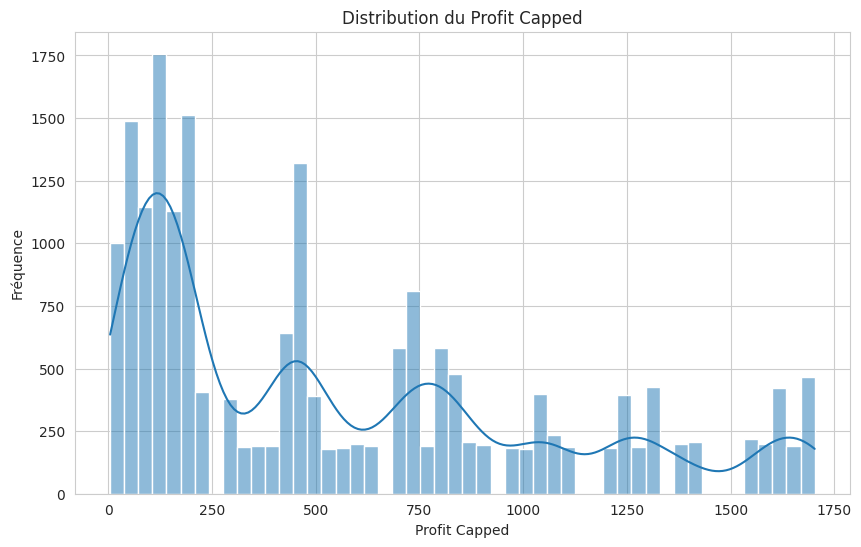

/tmp/ipython-input-11-3864346406.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='online_order', data=transactions, palette='viridis')


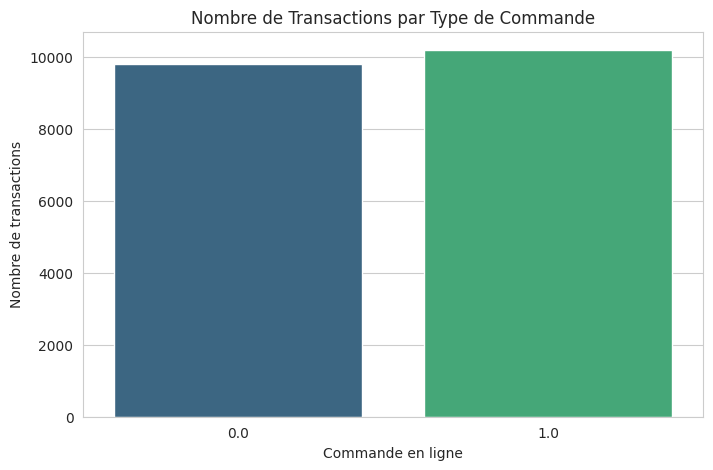

/tmp/ipython-input-11-3864346406.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='order_status', data=transactions, palette='magma')


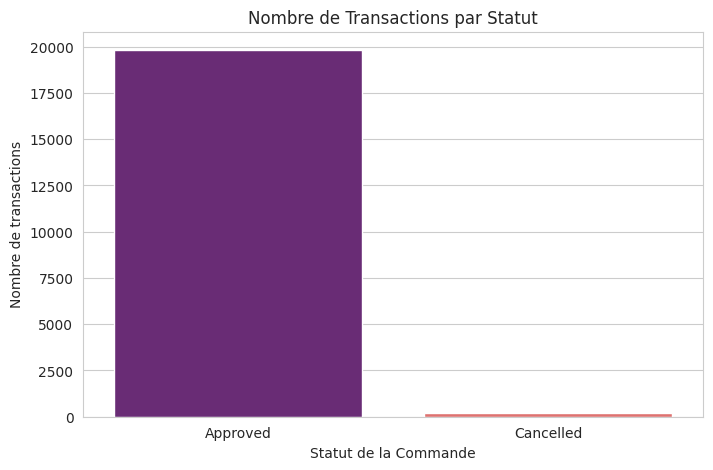

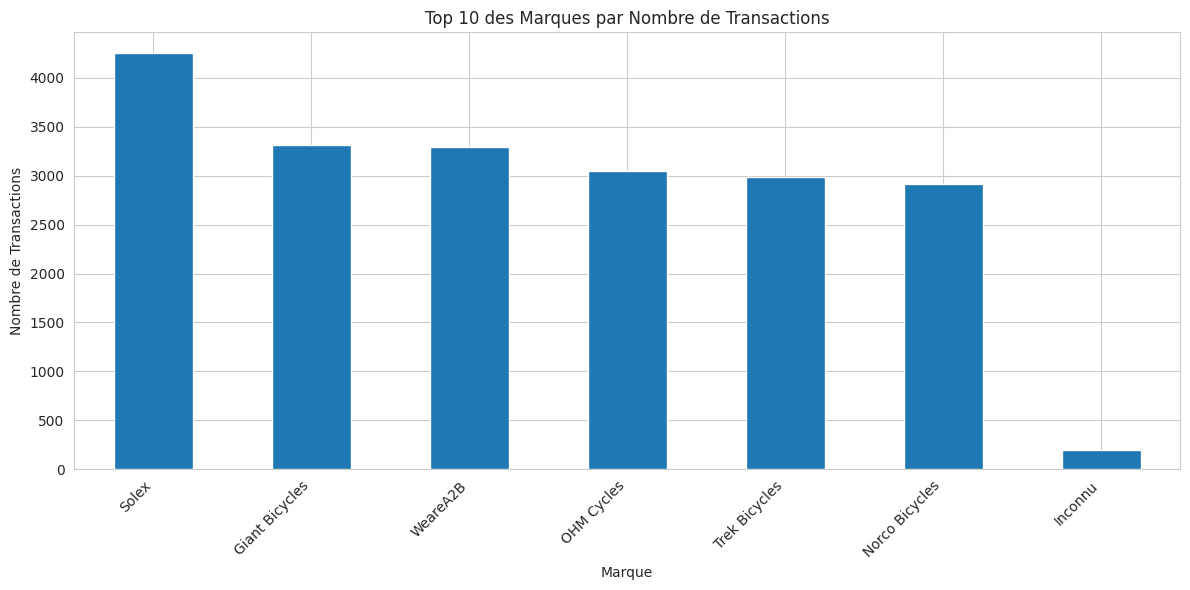

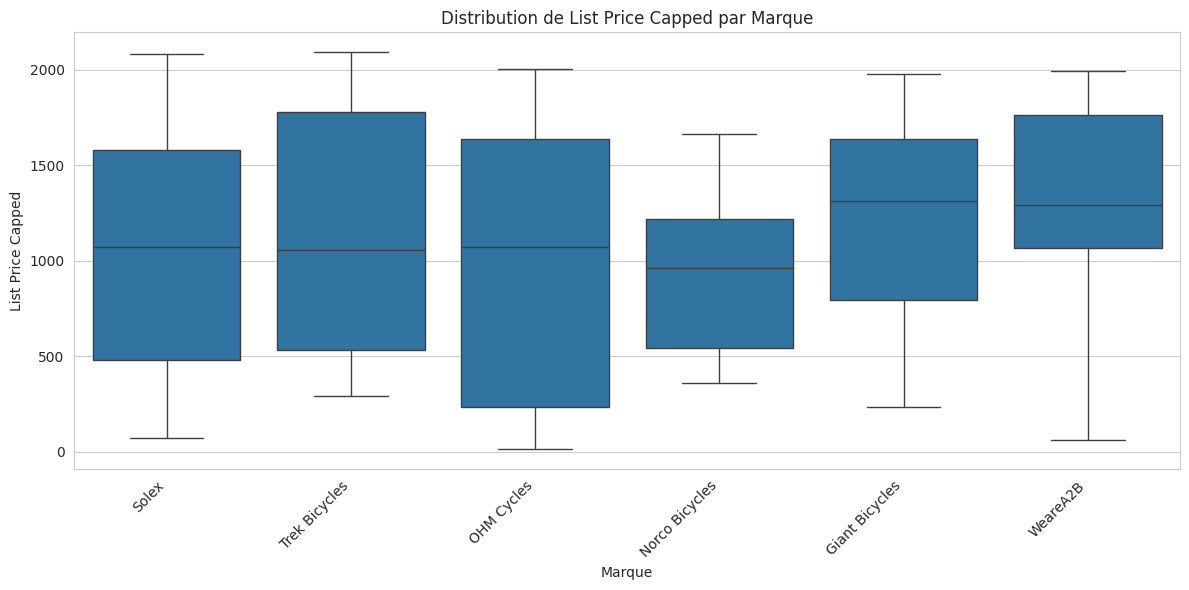

/tmp/ipython-input-11-3864346406.py:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  transactions.set_index('transaction_date').resample('M').size().plot()


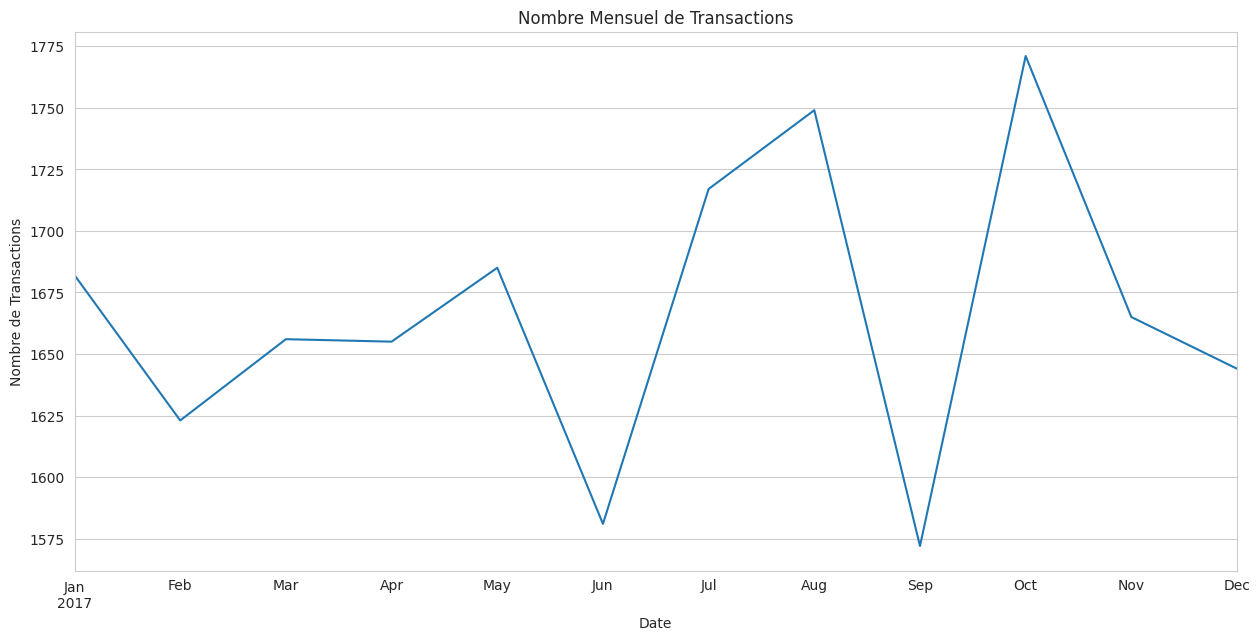


📊 Création de visualisations pour la feuille 'NewCustomerList'...


/tmp/ipython-input-11-3864346406.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=new_customer_list, palette='cividis')


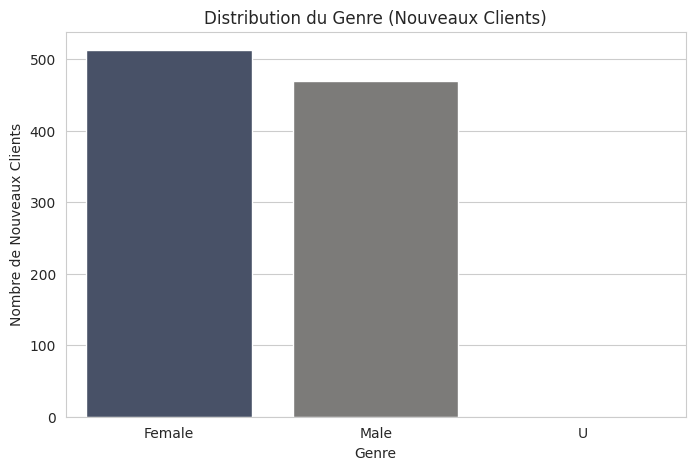

/tmp/ipython-input-11-3864346406.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='wealth_segment', data=new_customer_list, palette='plasma')


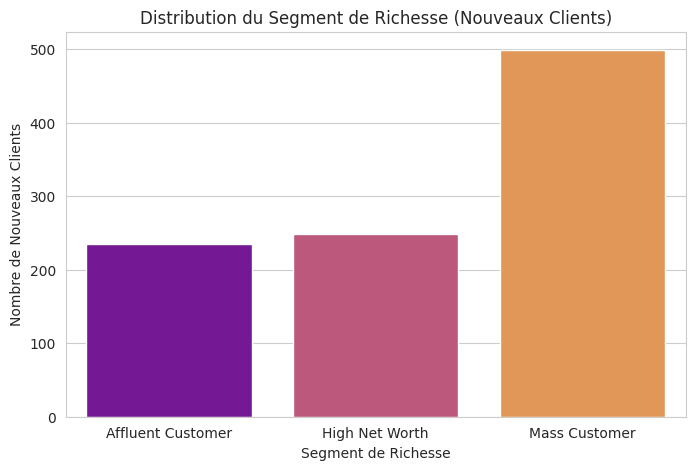

/tmp/ipython-input-11-3864346406.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='owns_car', data=new_customer_list, palette='viridis')


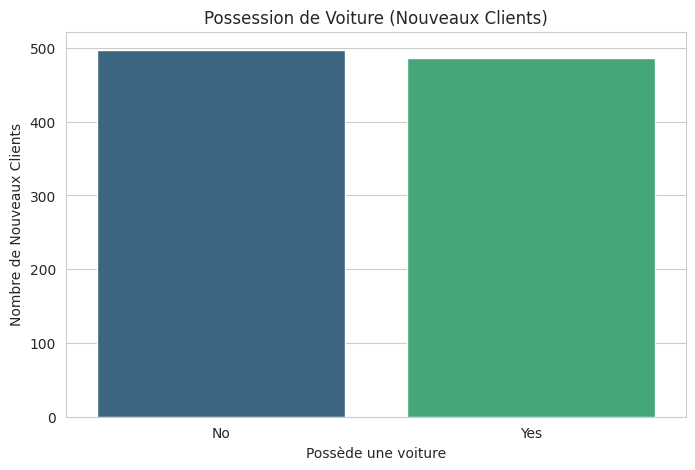

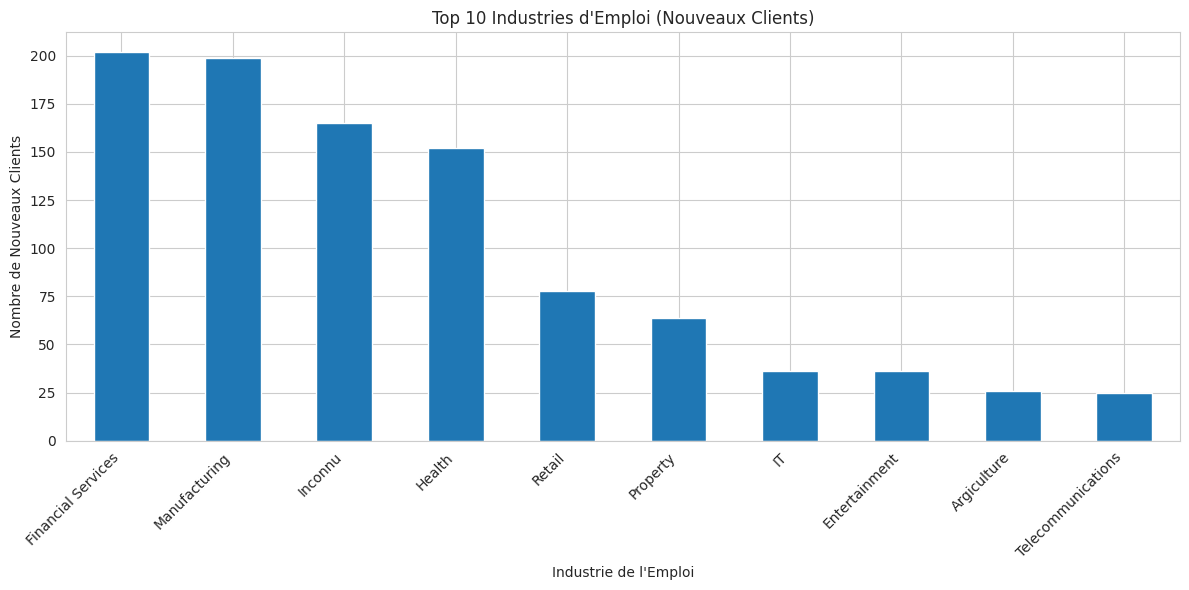

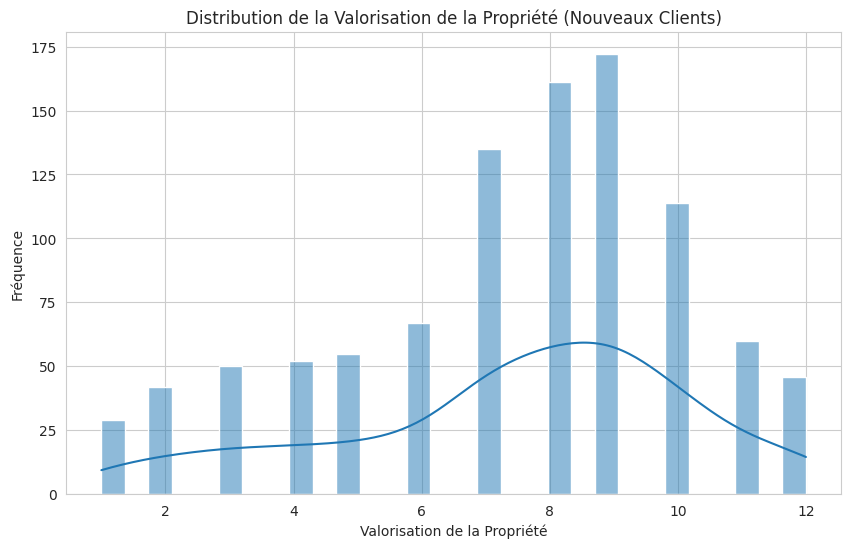


📊 Création de visualisations pour la feuille 'CustomerDemographic'...


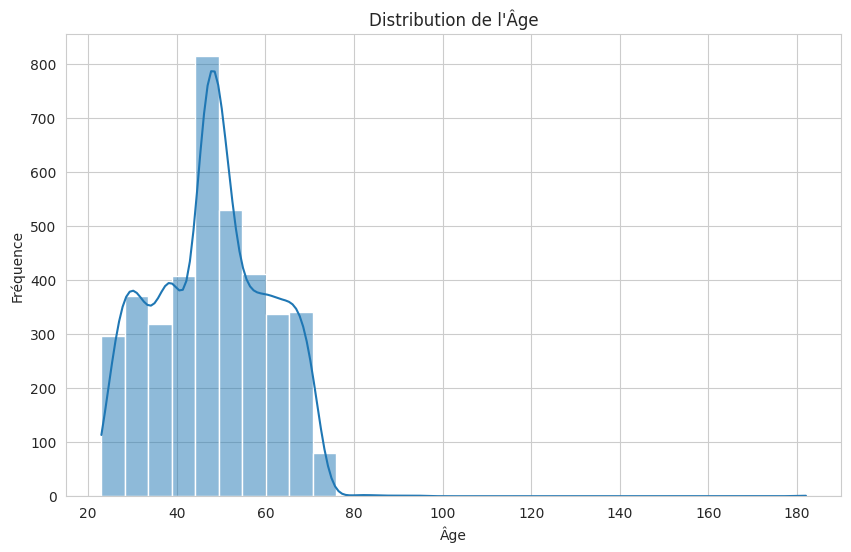

/tmp/ipython-input-11-3864346406.py:127: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=customer_demographic, palette='cividis')


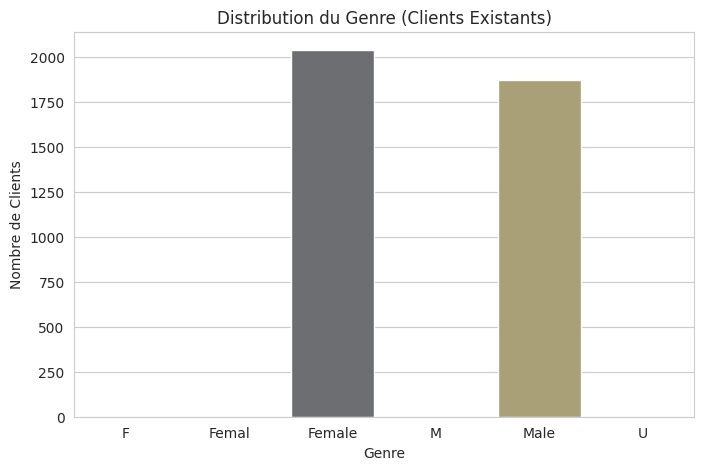

/tmp/ipython-input-11-3864346406.py:135: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='wealth_segment', data=customer_demographic, palette='plasma')


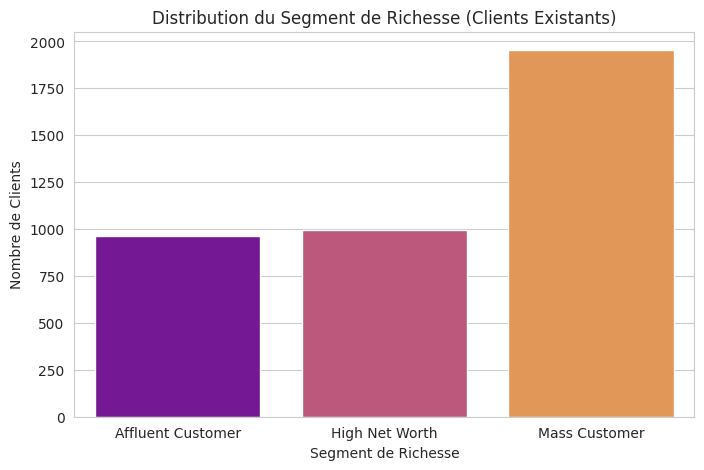

/tmp/ipython-input-11-3864346406.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='owns_car', data=customer_demographic, palette='viridis')


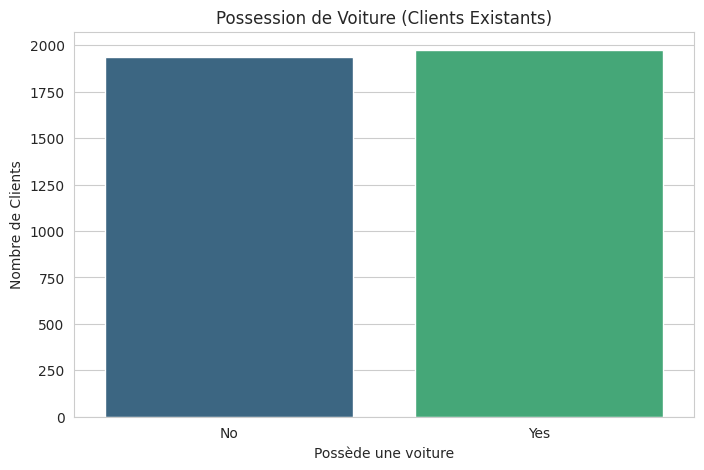

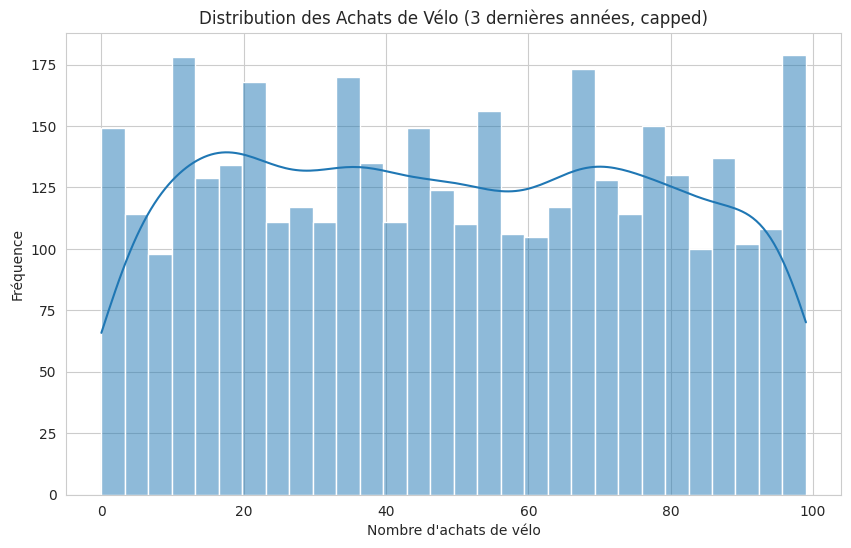

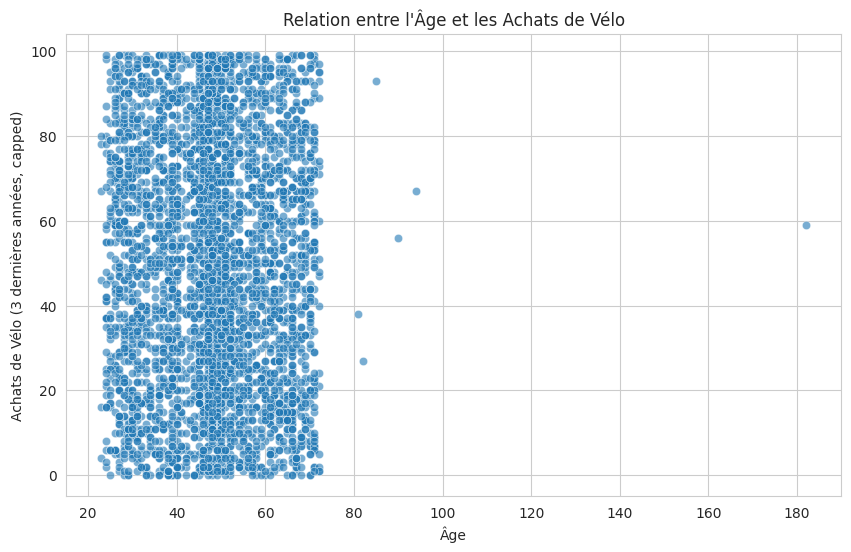


📊 Création de visualisations pour la feuille 'CustomerAddress'...


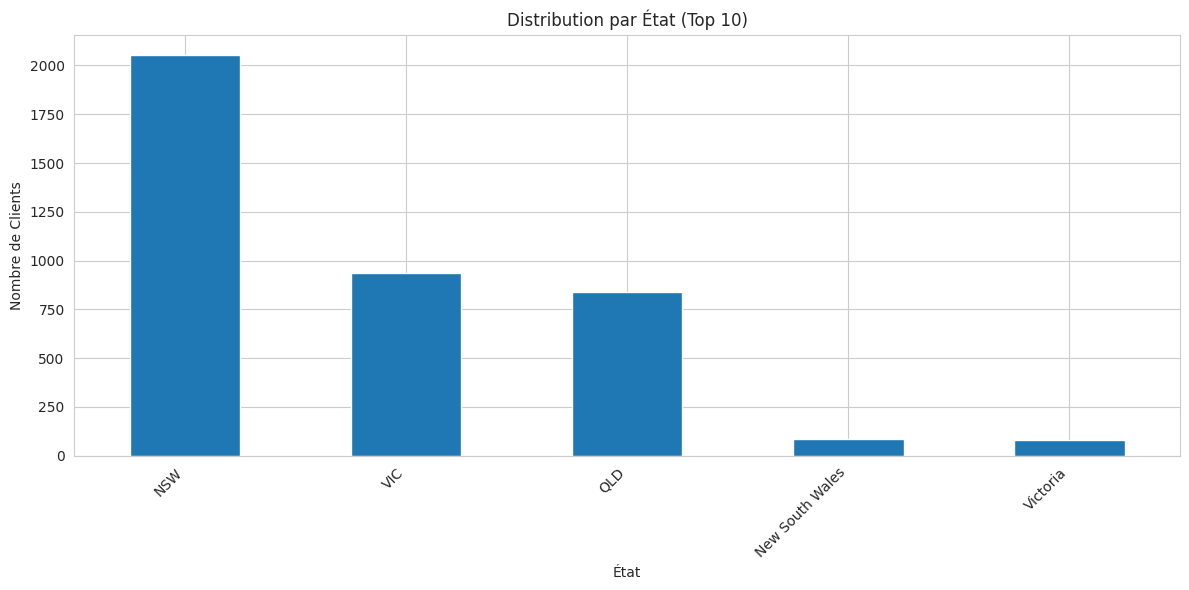

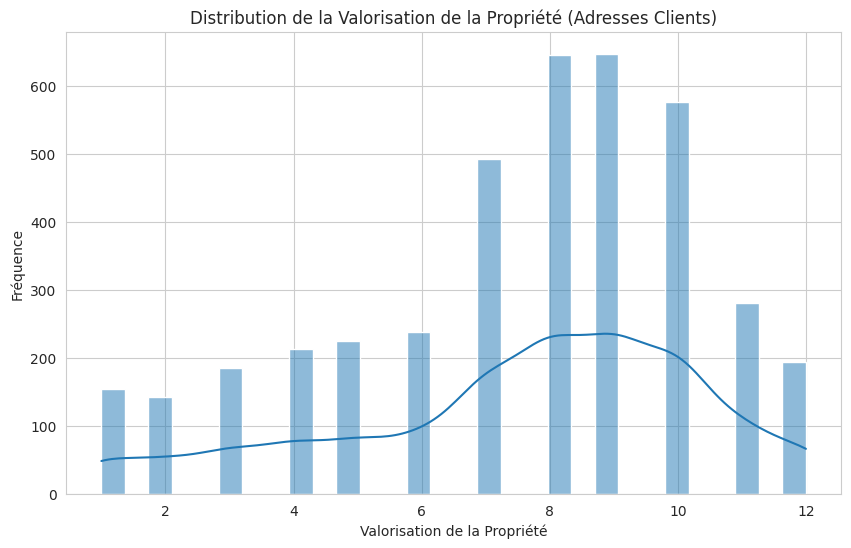

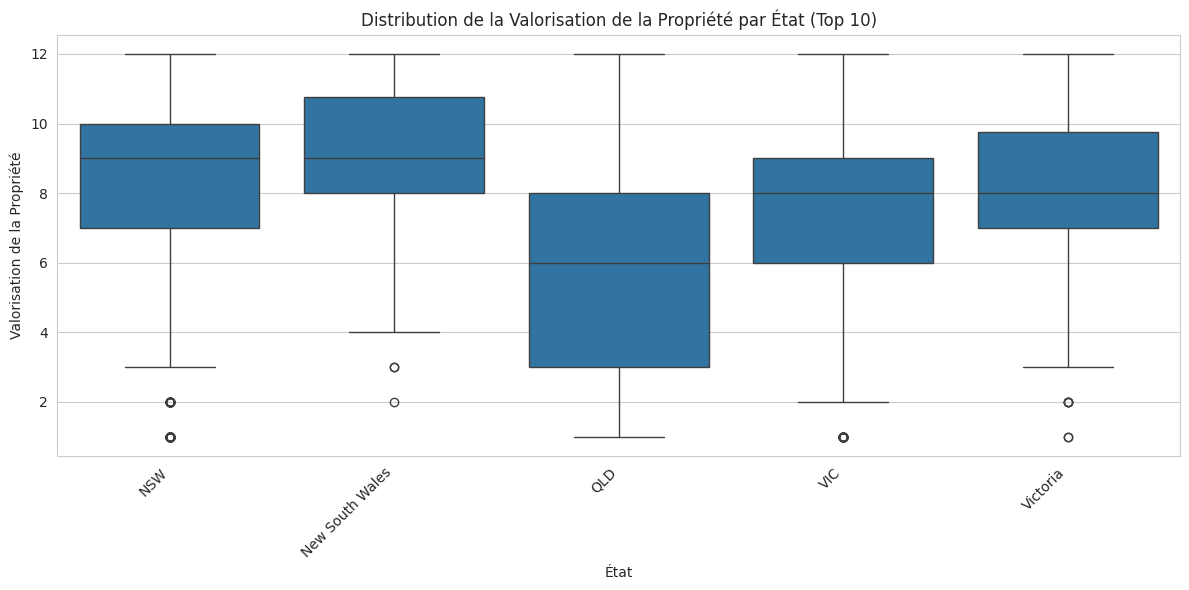

In [ ]:
# creer des visualisations essentielles permettant de comprendre les données dans chaque feuille après la gestion des incoherences

import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des styles pour les graphiques
sns.set_style("whitegrid")

# --- Visualisations pour la feuille 'Transactions' ---
print("\n📊 Création de visualisations pour la feuille 'Transactions'...")
transactions = feuilles['Transactions']

# Distribution des profits
plt.figure(figsize=(10, 6))
sns.histplot(transactions['profit_capped'], bins=50, kde=True)
plt.title('Distribution du Profit Capped')
plt.xlabel('Profit Capped')
plt.ylabel('Fréquence')
plt.show()

# Nombre de transactions par type de transaction (Online vs In Store)
plt.figure(figsize=(8, 5))
sns.countplot(x='online_order', data=transactions, palette='viridis')
plt.title('Nombre de Transactions par Type de Commande')
plt.xlabel('Commande en ligne')
plt.ylabel('Nombre de transactions')
plt.show()

# Nombre de transactions par statut de commande
plt.figure(figsize=(8, 5))
sns.countplot(x='order_status', data=transactions, palette='magma')
plt.title('Nombre de Transactions par Statut')
plt.xlabel('Statut de la Commande')
plt.ylabel('Nombre de transactions')
plt.show()

# Top 10 des marques par nombre de transactions
plt.figure(figsize=(12, 6))
transactions['brand'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 des Marques par Nombre de Transactions')
plt.xlabel('Marque')
plt.ylabel('Nombre de Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Prix moyen par marque (en utilisant list_price_capped)
plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='list_price_capped', data=transactions[transactions['brand'] != 'Inconnu'])
plt.title('Distribution de List Price Capped par Marque')
plt.xlabel('Marque')
plt.ylabel('List Price Capped')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Tendances temporelles des transactions (nombre de transactions par date)
plt.figure(figsize=(15, 7))
transactions.set_index('transaction_date').resample('M').size().plot()
plt.title('Nombre Mensuel de Transactions')
plt.xlabel('Date')
plt.ylabel('Nombre de Transactions')
plt.show()


# --- Visualisations pour la feuille 'NewCustomerList' ---
print("\n📊 Création de visualisations pour la feuille 'NewCustomerList'...")
new_customer_list = feuilles['NewCustomerList']

# Distribution par genre
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=new_customer_list, palette='cividis')
plt.title('Distribution du Genre (Nouveaux Clients)')
plt.xlabel('Genre')
plt.ylabel('Nombre de Nouveaux Clients')
plt.show()

# Distribution par segment de richesse
plt.figure(figsize=(8, 5))
sns.countplot(x='wealth_segment', data=new_customer_list, palette='plasma')
plt.title('Distribution du Segment de Richesse (Nouveaux Clients)')
plt.xlabel('Segment de Richesse')
plt.ylabel('Nombre de Nouveaux Clients')
plt.show()

# Distribution par Possession de voiture
plt.figure(figsize=(8, 5))
sns.countplot(x='owns_car', data=new_customer_list, palette='viridis')
plt.title('Possession de Voiture (Nouveaux Clients)')
plt.xlabel('Possède une voiture')
plt.ylabel('Nombre de Nouveaux Clients')
plt.show()

# Distribution par Industrie de l'emploi (Top 10)
plt.figure(figsize=(12, 6))
new_customer_list['job_industry_category'].value_counts().nlargest(10).plot(kind='bar')
plt.title("Top 10 Industries d'Emploi (Nouveaux Clients)")
plt.xlabel("Industrie de l'Emploi")
plt.ylabel('Nombre de Nouveaux Clients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution de la valorisation de la propriété
plt.figure(figsize=(10, 6))
sns.histplot(new_customer_list['property_valuation'], bins=30, kde=True)
plt.title('Distribution de la Valorisation de la Propriété (Nouveaux Clients)')
plt.xlabel('Valorisation de la Propriété')
plt.ylabel('Fréquence')
plt.show()


# --- Visualisations pour la feuille 'CustomerDemographic' ---
print("\n📊 Création de visualisations pour la feuille 'CustomerDemographic'...")
customer_demographic = feuilles['CustomerDemographic']

# Distribution de l'âge
plt.figure(figsize=(10, 6))
sns.histplot(customer_demographic['Age'], bins=30, kde=True)
plt.title("Distribution de l'Âge")
plt.xlabel("Âge")
plt.ylabel('Fréquence')
plt.show()

# Distribution par genre
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=customer_demographic, palette='cividis')
plt.title('Distribution du Genre (Clients Existants)')
plt.xlabel('Genre')
plt.ylabel('Nombre de Clients')
plt.show()

# Distribution par segment de richesse
plt.figure(figsize=(8, 5))
sns.countplot(x='wealth_segment', data=customer_demographic, palette='plasma')
plt.title('Distribution du Segment de Richesse (Clients Existants)')
plt.xlabel('Segment de Richesse')
plt.ylabel('Nombre de Clients')
plt.show()

# Distribution par Possession de voiture
plt.figure(figsize=(8, 5))
sns.countplot(x='owns_car', data=customer_demographic, palette='viridis')
plt.title('Possession de Voiture (Clients Existants)')
plt.xlabel('Possède une voiture')
plt.ylabel('Nombre de Clients')
plt.show()

# Distribution des achats de vélo sur les 3 dernières années (capped)
plt.figure(figsize=(10, 6))
sns.histplot(customer_demographic['past_3_years_bike_purchases_capped'], bins=30, kde=True)
plt.title("Distribution des Achats de Vélo (3 dernières années, capped)")
plt.xlabel("Nombre d'achats de vélo")
plt.ylabel('Fréquence')
plt.show()

# Relation entre Age et achats de vélo
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='past_3_years_bike_purchases_capped', data=customer_demographic, alpha=0.6)
plt.title("Relation entre l'Âge et les Achats de Vélo")
plt.xlabel("Âge")
plt.ylabel("Achats de Vélo (3 dernières années, capped)")
plt.show()


# --- Visualisations pour la feuille 'CustomerAddress' ---
print("\n📊 Création de visualisations pour la feuille 'CustomerAddress'...")
customer_address = feuilles['CustomerAddress']

# Distribution par état (Top 10)
plt.figure(figsize=(12, 6))
customer_address['state'].value_counts().nlargest(10).plot(kind='bar')
plt.title("Distribution par État (Top 10)")
plt.xlabel('État')
plt.ylabel('Nombre de Clients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribution de la valorisation de la propriété
plt.figure(figsize=(10, 6))
sns.histplot(customer_address['property_valuation'], bins=30, kde=True)
plt.title('Distribution de la Valorisation de la Propriété (Adresses Clients)')
plt.xlabel('Valorisation de la Propriété')
plt.ylabel('Fréquence')
plt.show()

# Relation entre état et valorisation de la propriété (Top 10 états)
plt.figure(figsize=(12, 6))
top_states = customer_address['state'].value_counts().nlargest(10).index
sns.boxplot(x='state', y='property_valuation', data=customer_address[customer_address['state'].isin(top_states)])
plt.title('Distribution de la Valorisation de la Propriété par État (Top 10)')
plt.xlabel('État')
plt.ylabel('Valorisation de la Propriété')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

